# Unsupervised Learning - Credit card dataset
___
### Dataset Description :
1) CUSTID: Identification of Credit Card holder (Categorical)

2) BALANCE: Balance amount left in their account to make purchases

3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

4) PURCHASES: Amount of purchases made from account

5) ONEOFFPURCHASES: Maximum purchase amount done in one-go

6) INSTALLMENTSPURCHASES: Amount of purchase done in installment

7) CASHADVANCE: Cash in advance given by the user

8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid

12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"

13) PURCHASESTRX: Number of purchase transactions made

14) CREDITLIMIT: Limit of Credit Card for user

15) PAYMENTS: Amount of Payment done by user

16) MINIMUM_PAYMENTS: Minimum amount of payments made by user

17) PRCFULLPAYMENT: Percent of full payment paid by user

18) TENURE: Tenure of credit card service for user

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading and displaying the dataset
df=pd.read_csv('E:\Paper2\credit_card.csv',sep=',')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#Getting the shape of the dataset
df.shape

(8950, 18)

In [ ]:
#Details about each and every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Q1. Primary analysis of several categorical features

In [ ]:
#Extracting the names of categorical column
cat_col=df.select_dtypes(include=['object']).columns.tolist()
cat_col

['CUST_ID']

In [ ]:
df.CUST_ID.nunique()

8950

In [ ]:
df.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


## Q2. Exploratory Data Analysis tasks

<AxesSubplot:>

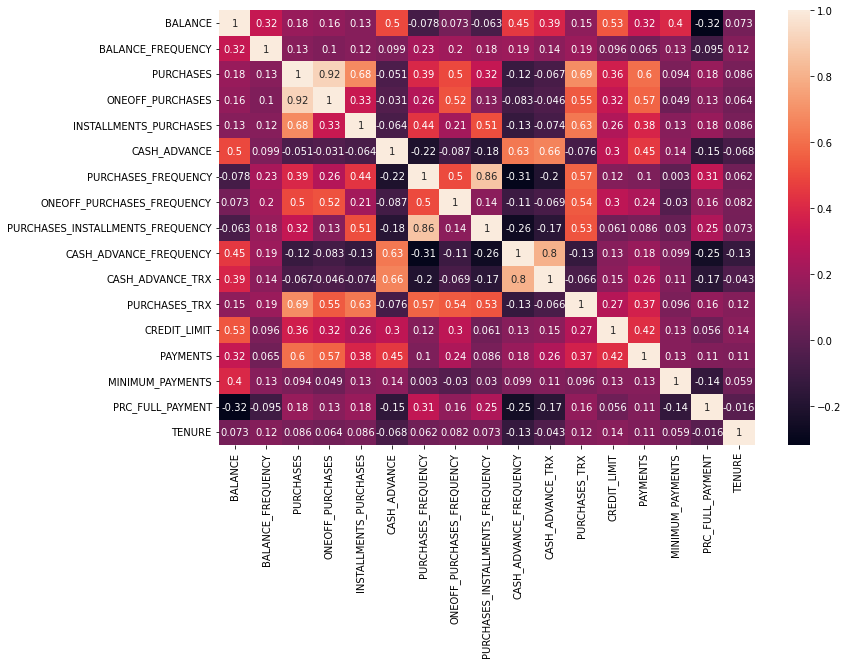

In [ ]:
#Checking correlation between variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

### a) Missing Value Analysis

In [ ]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

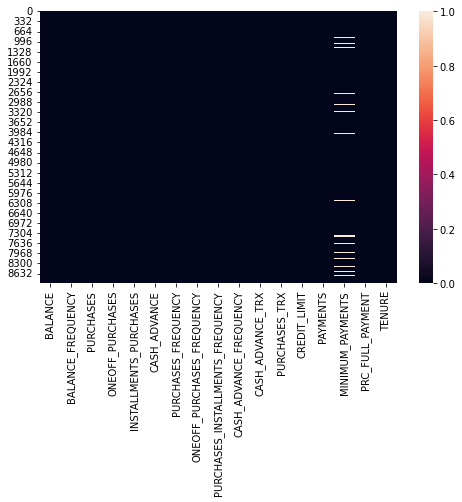

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

In [ ]:
df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean()),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean()),inplace=True)

In [ ]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

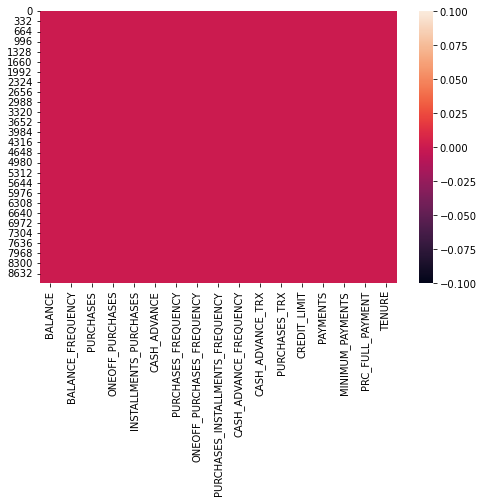

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

### b) Outlier Treatment using the Z-score method

In [ ]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) <3).all(axis=1)]

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125000,3,7,500.0,98.225317,113.944625,0.000000,8
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125000,3,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000000,0,6,1000.0,169.249683,124.639905,0.000000,8


### c) Dealing with correlated variables

<AxesSubplot:>

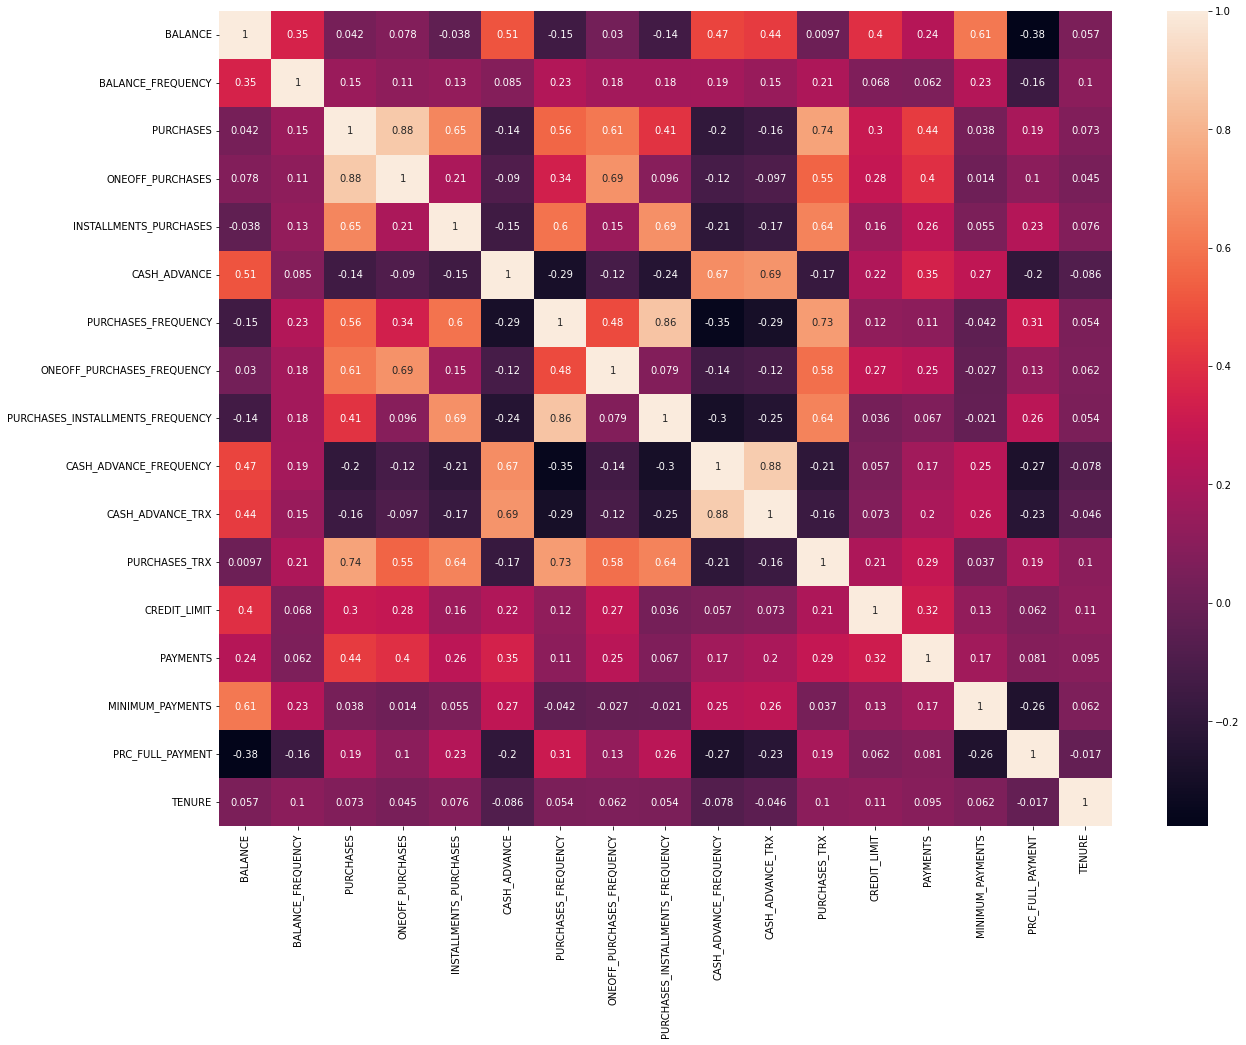

In [ ]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True)

In [ ]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
df = df.drop(columns=to_drop, axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,0.00,169.554775,0.500000,0.500000,0.125000,7,500.0,98.225317,113.944625,0.000000,8
8877,55.147722,0.875000,163.31,163.31,0.000000,0.875000,0.000000,0.000000,7,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0.750000,0.00,0.00,1153.925205,0.000000,0.000000,0.125000,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1.000000,441.00,441.00,0.000000,0.750000,0.000000,0.000000,6,1000.0,169.249683,124.639905,0.000000,8


## Q3. PCA

In [ ]:
from sklearn.decomposition import PCA

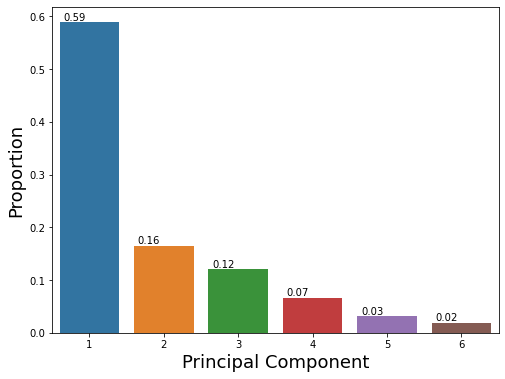

In [ ]:
sk_pca = PCA(n_components=6)
sk_pca.fit(df)
dset2 = pd.DataFrame()
dset2['pca'] = range(1,7)
dset2['vari'] = pd.DataFrame(sk_pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset2)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

No handles with labels found to put in legend.


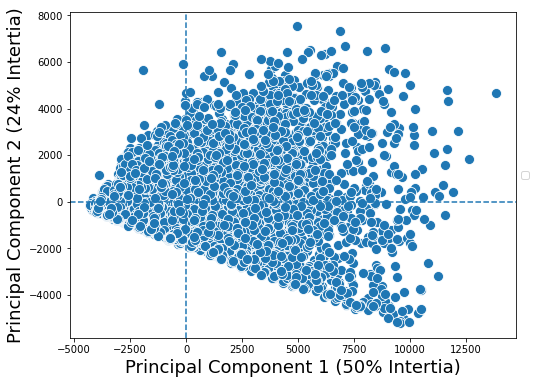

In [ ]:
x_pca = sk_pca.transform(df[df.columns])

plt.figure(figsize=(8,6))
sns.scatterplot(x_pca[:,0],x_pca[:,1],
                palette="Set1", legend='full', s=100).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Principal Component 1 (50% Intertia)',fontsize=18)
plt.ylabel('Principal Component 2 (24% Intertia)', fontsize=18)
plt.axvline(0, ls='--')
plt.axhline(0, ls='--')
plt.show()

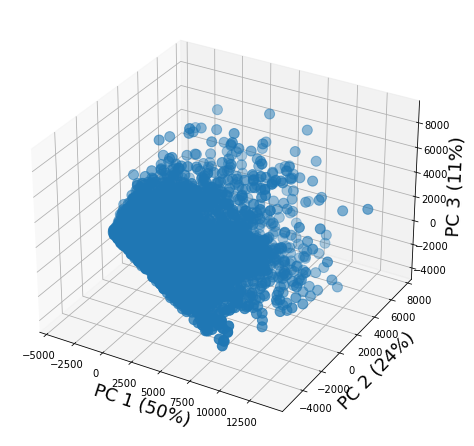

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2], s=100, cmap="Set1")
ax.set_xlabel('PC 1 (50%)',fontsize=18)
ax.set_ylabel('PC 2 (24%)',fontsize=18)
ax.set_zlabel('PC 3 (11%)',fontsize=18)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit_transform(df)

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,0.00,169.554775,0.500000,0.500000,0.125000,7,500.0,98.225317,113.944625,0.000000,8
8877,55.147722,0.875000,163.31,163.31,0.000000,0.875000,0.000000,0.000000,7,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0.750000,0.00,0.00,1153.925205,0.000000,0.000000,0.125000,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1.000000,441.00,441.00,0.000000,0.750000,0.000000,0.000000,6,1000.0,169.249683,124.639905,0.000000,8


## Q4. K means - Elbow Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(n_clusters=k , random_state=0)
    predict=cluster.fit_predict(df)

    score=silhouette_score(df , predict , random_state=0)
    print('for n_clusters={} , silhoutte score is {}'.format(k, score))

for n_clusters=2 , silhoutte score is 0.4521131625358664
for n_clusters=3 , silhoutte score is 0.43852974612301515
for n_clusters=4 , silhoutte score is 0.3605501004917412
for n_clusters=5 , silhoutte score is 0.3562657869148566
for n_clusters=6 , silhoutte score is 0.3274258710460645
for n_clusters=7 , silhoutte score is 0.32979793027838405
for n_clusters=8 , silhoutte score is 0.2573315430431648


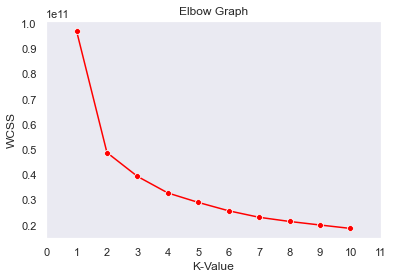

In [ ]:
sns.set(style="darkgrid")
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="random", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

## Q5.Finding the optimum value of k


In [ ]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 2, random_state=0)

# fit the model
predict=model.fit_predict(df)
score=silhouette_score(df , predict , random_state=0)
print('silhoutte score is {}'.format(score))

silhoutte score is 0.4521131625358664


In [ ]:
data_output = df.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12,0
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)

(array([0, 1]), array([2308, 5126], dtype=int64))

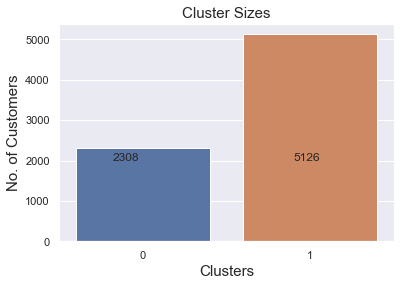

In [ ]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])

plt.show()